In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [35]:
calif_data_set = fetch_california_housing()
ames_data_set = fetch_openml(name="house_prices", as_frame=True)


In [36]:
dir(calif_data_set)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [37]:
dir(ames_data_set)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [38]:
print(calif_data_set.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [39]:
print(ames_data_set.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [42]:
calif_data_set.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [43]:
ames_data_set.feature_names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [40]:
calif_data_set.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [41]:
ames_data_set.data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [44]:
calif_data_set.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [45]:
ames_data_set.target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [46]:
calif_data_set.target_names

['MedHouseVal']

In [47]:
ames_data_set.target_names

['SalePrice']

DATA exploration with Pandas daraframes

In [48]:
#Create a pandas dataframe California dataset
calif_data = pd.DataFrame(data=calif_data_set.data, columns=calif_data_set.feature_names)
calif_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [49]:
#Create a pandas dataframe Ames dataset
ames_data = pd.DataFrame(data=ames_data_set.data, columns=ames_data_set.feature_names)
ames_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [50]:
calif_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [51]:
ames_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
#Add column with the price(target)
calif_data['Price'] = calif_data_set.target
calif_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
ames_data['Price'] = ames_data_set.target
ames_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Cleaning data - check for missing values

In [54]:
pd.isnull(calif_data).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
Price         False
dtype: bool

In [55]:
pd.isnull(ames_data).any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Price            False
Length: 81, dtype: bool

In [56]:
calif_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [57]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

VISUALIZATION

CALIFORNIA DATA

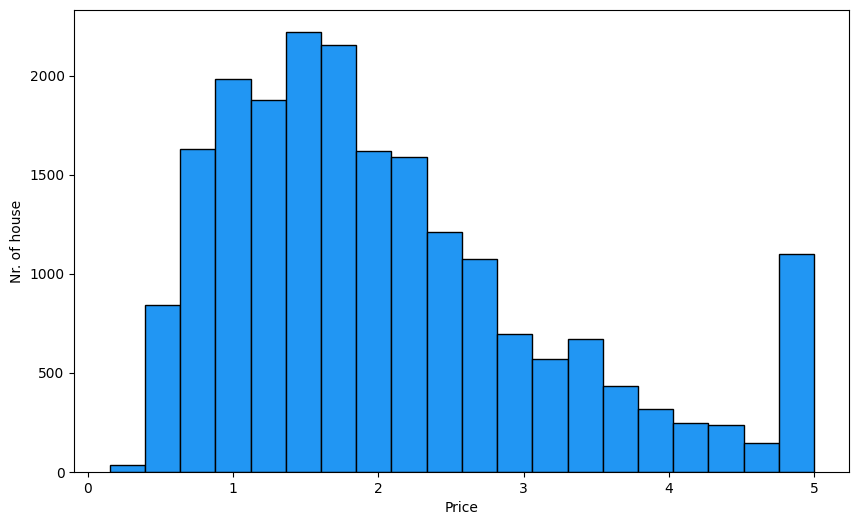

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(calif_data['Price'], bins=20, ec='black', color='#2196f3')
plt.xlabel('Price')
plt.ylabel('Nr. of house')
plt.show()

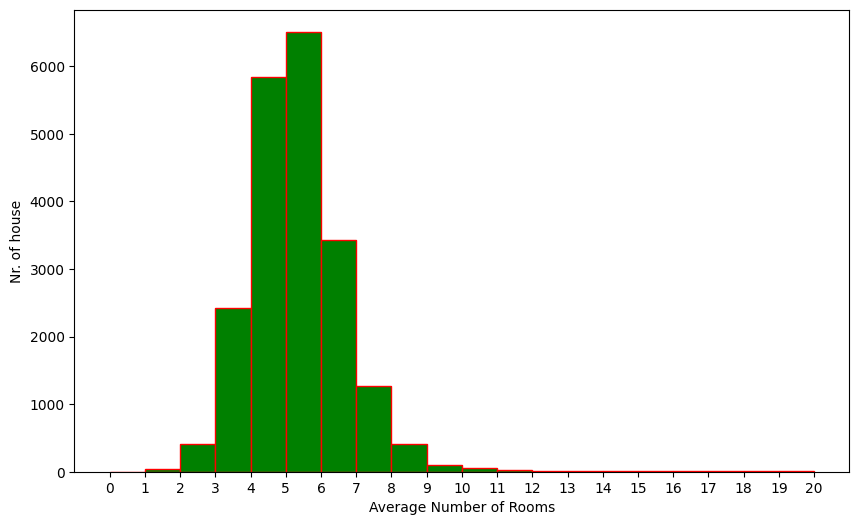

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(calif_data['AveRooms'],bins=range(0, 21), ec='red', color='green') #'bins=range(0, 21) определяет интервалы гистограммы от 0 до 20.
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of house')
plt.xticks(range(0, 21, 1)) #устанавливает метки оси x с шагом 1 в диапазоне от 0 до 20.
plt.show()

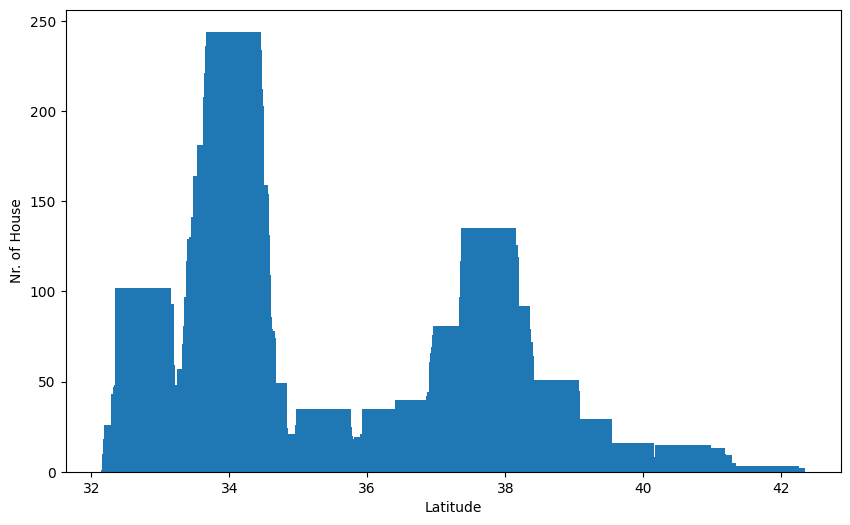

In [60]:
# filtered_data = data[data['Latitude'] > 37]
# # Calculate frequency for the filtered data
frequency = calif_data['Latitude'].value_counts()
plt.figure(figsize=(10, 6))
plt.xlabel("Latitude")
plt.ylabel('Nr. of House')
plt.bar(frequency.index, height=frequency)
plt.show()

In [61]:
calif_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


AMES DATA visualization

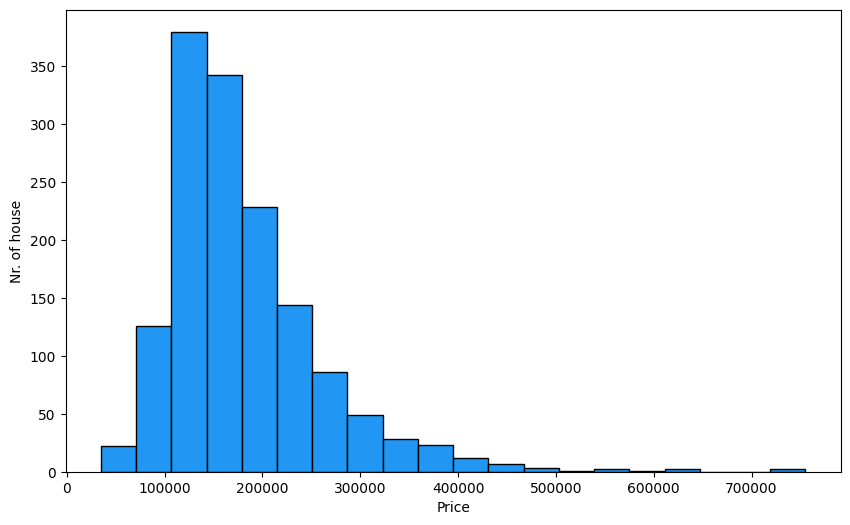

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(ames_data['Price'], bins=20, ec='black', color='#2196f3')
plt.xlabel('Price')
plt.ylabel('Nr. of house')
plt.show()

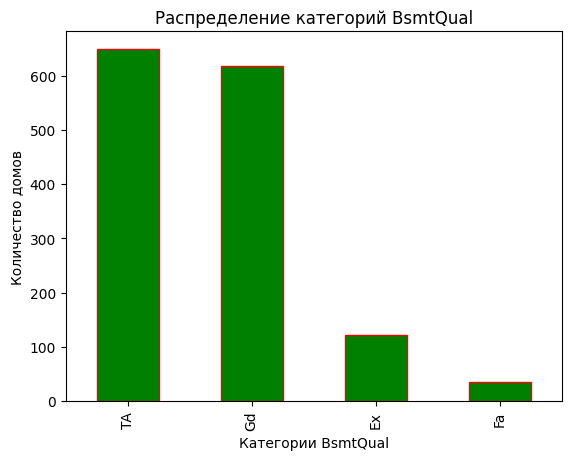

In [65]:

# Предполагая, что ames_data - это ваш DataFrame
ames_data['BsmtQual'].value_counts().plot(kind='bar', color='green', edgecolor='red')
plt.xlabel('Категории BsmtQual')
plt.ylabel('Количество домов')
plt.title('Распределение категорий BsmtQual')
plt.show()

In [76]:
x = (ames_data['BsmtQual'] == 'Fa').sum()
x

35

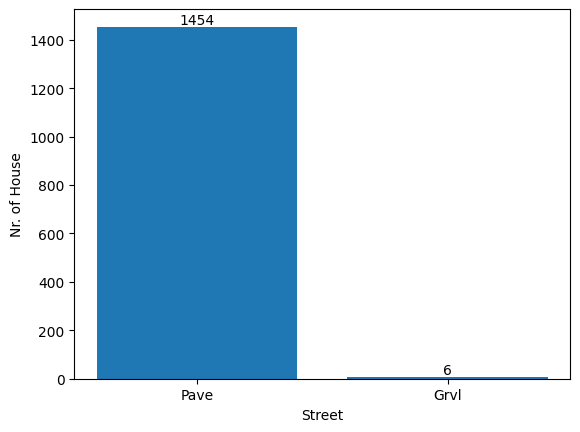

In [88]:
frequency = ames_data['Street'].value_counts()
plt.xlabel("Street")
plt.ylabel('Nr. of House')
bars = plt.bar(frequency.index, height=frequency)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va = 'bottom')
    

plt.show()

In [94]:
ames_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [93]:
ames_data['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

КОРЕЛЯЦИЯ

In [97]:
calif_data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [90]:
calif_data['Price'].corr(calif_data['AveRooms'])

0.15194828974145785

In [98]:
calif_data['Price'].corr(calif_data['HouseAge'])

0.10562341249320992

In [99]:
calif_data['Price'].corr(calif_data['AveBedrms'])

-0.04670051296948685

In [104]:
calif_data['Price'].corr(calif_data['MedInc'])

0.6880752079585477

In [106]:
calif_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [113]:
calif_mask = np.zeros_like(calif_data.corr())
triangle_indices = np.triu_indices_from(calif_mask)
calif_mask[triangle_indices] = True
calif_mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

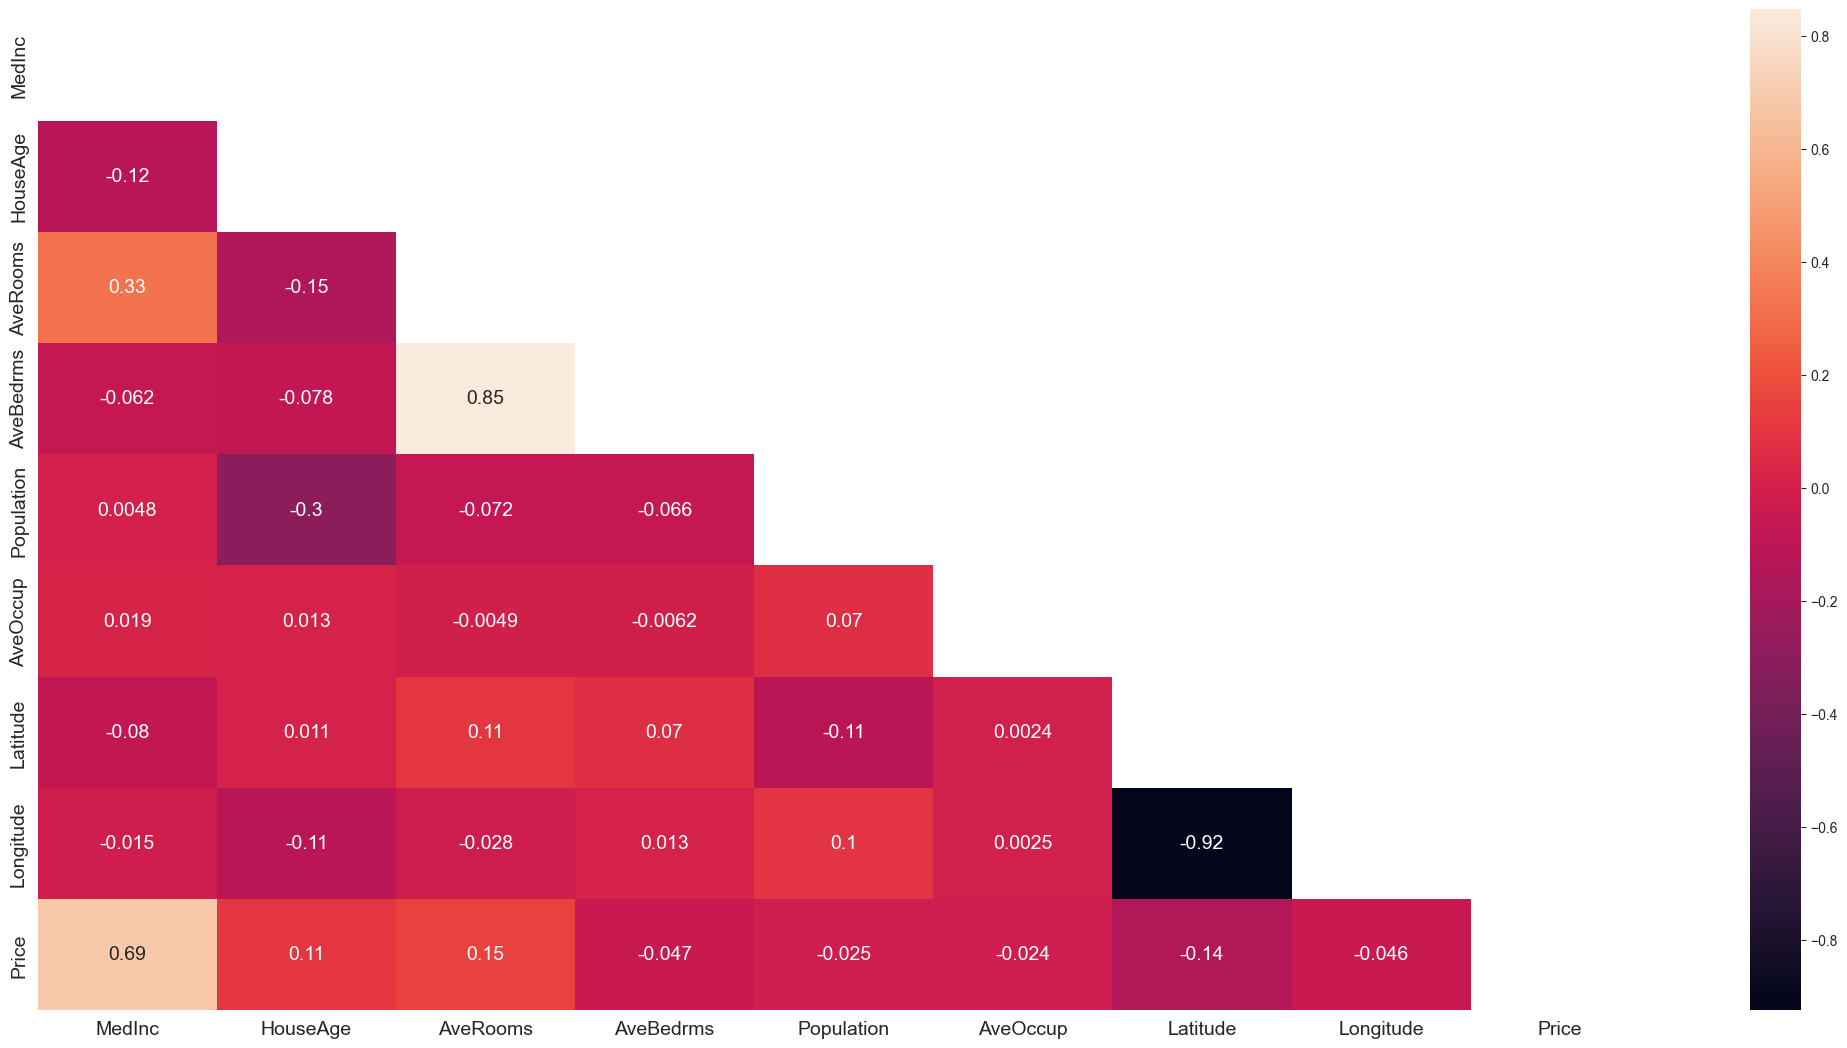

In [118]:
plt.figure(figsize=(26, 13))
sns.heatmap(calif_data.corr(), mask=calif_mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

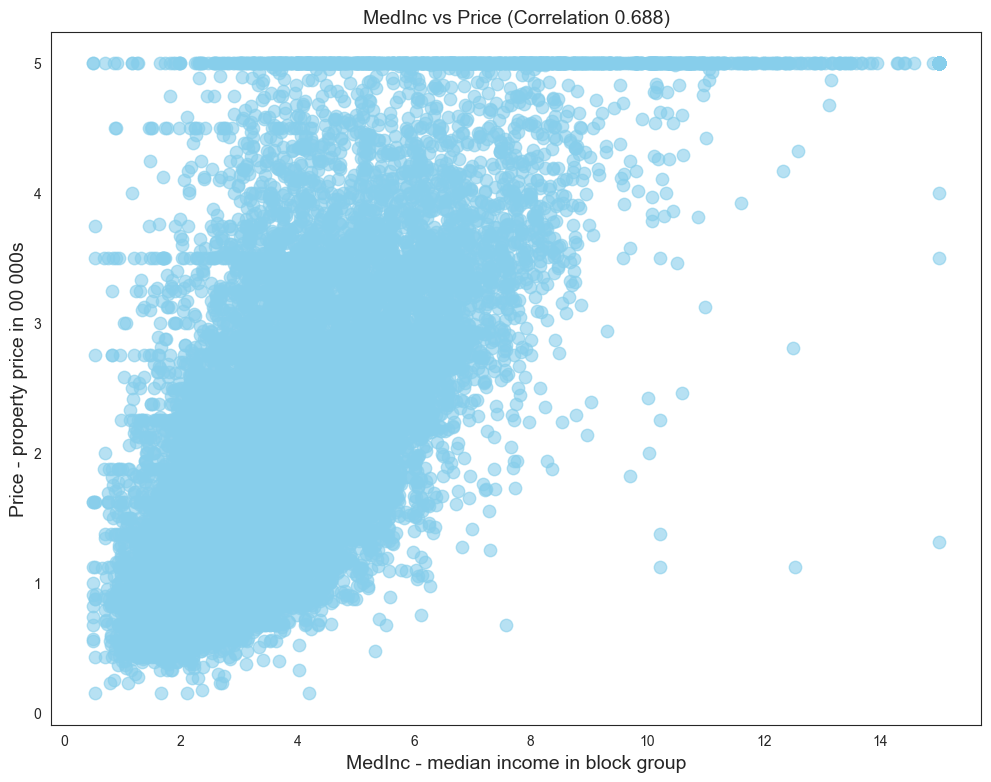

In [120]:
rm_tgt_corr = round(calif_data['MedInc'].corr(calif_data['Price']),3)
plt.figure(figsize=(12, 9))
plt.scatter(x=calif_data['MedInc'], y=calif_data['Price'], alpha=0.6, s=80, color='skyblue')

plt.title(f"MedInc vs Price (Correlation {rm_tgt_corr})", fontsize=14)
plt.xlabel('MedInc - median income in block group', fontsize=14)
plt.ylabel('Price - property price in 00 000s', fontsize=14)
plt.show()

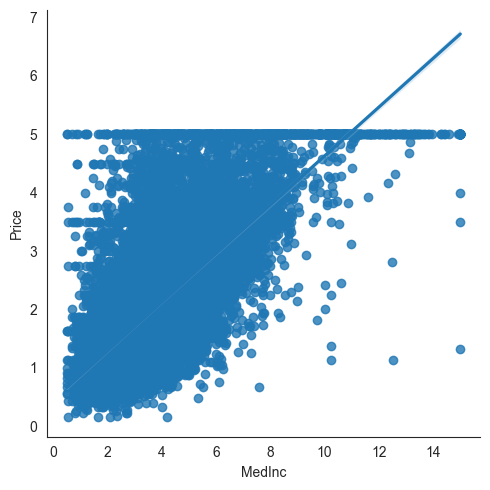

In [128]:
sns.lmplot(x='MedInc', y='Price', data=calif_data)

# Отображаем график
plt.show()

In [95]:
#корреляцию между двумя категориальными переменными, 
# можно воспользоваться коэффициентом корреляции Крамера или другими мерами ассоциации для категориальных данных.
from scipy.stats import chi2_contingency

# Создание таблицы сопряженности
contingency_table = pd.crosstab(ames_data['Price'], ames_data['BsmtQual'])

# Выполнение теста хи-квадрат
chi2, p, _, _ = chi2_contingency(contingency_table)

# Расчет коэффициента корреляции Крамера
observed = contingency_table.values
n = observed.sum()
min_dim = min(observed.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramer's V: {cramer_v}")


Cramer's V: 0.77930242224828


In [105]:
ames_data['Price'].corr(ames_data['YearBuilt'])

0.5228973328794968

In [109]:
#вычислить корреляции между числовыми столбцами, сначала выбрать только числовые столбцы:

numeric_data = ames_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
correlation_matrix


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [115]:
ames_mask = np.zeros_like(numeric_data.corr())
triangle_indices = np.triu_indices_from(ames_mask)
ames_mask[triangle_indices] = True
ames_mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

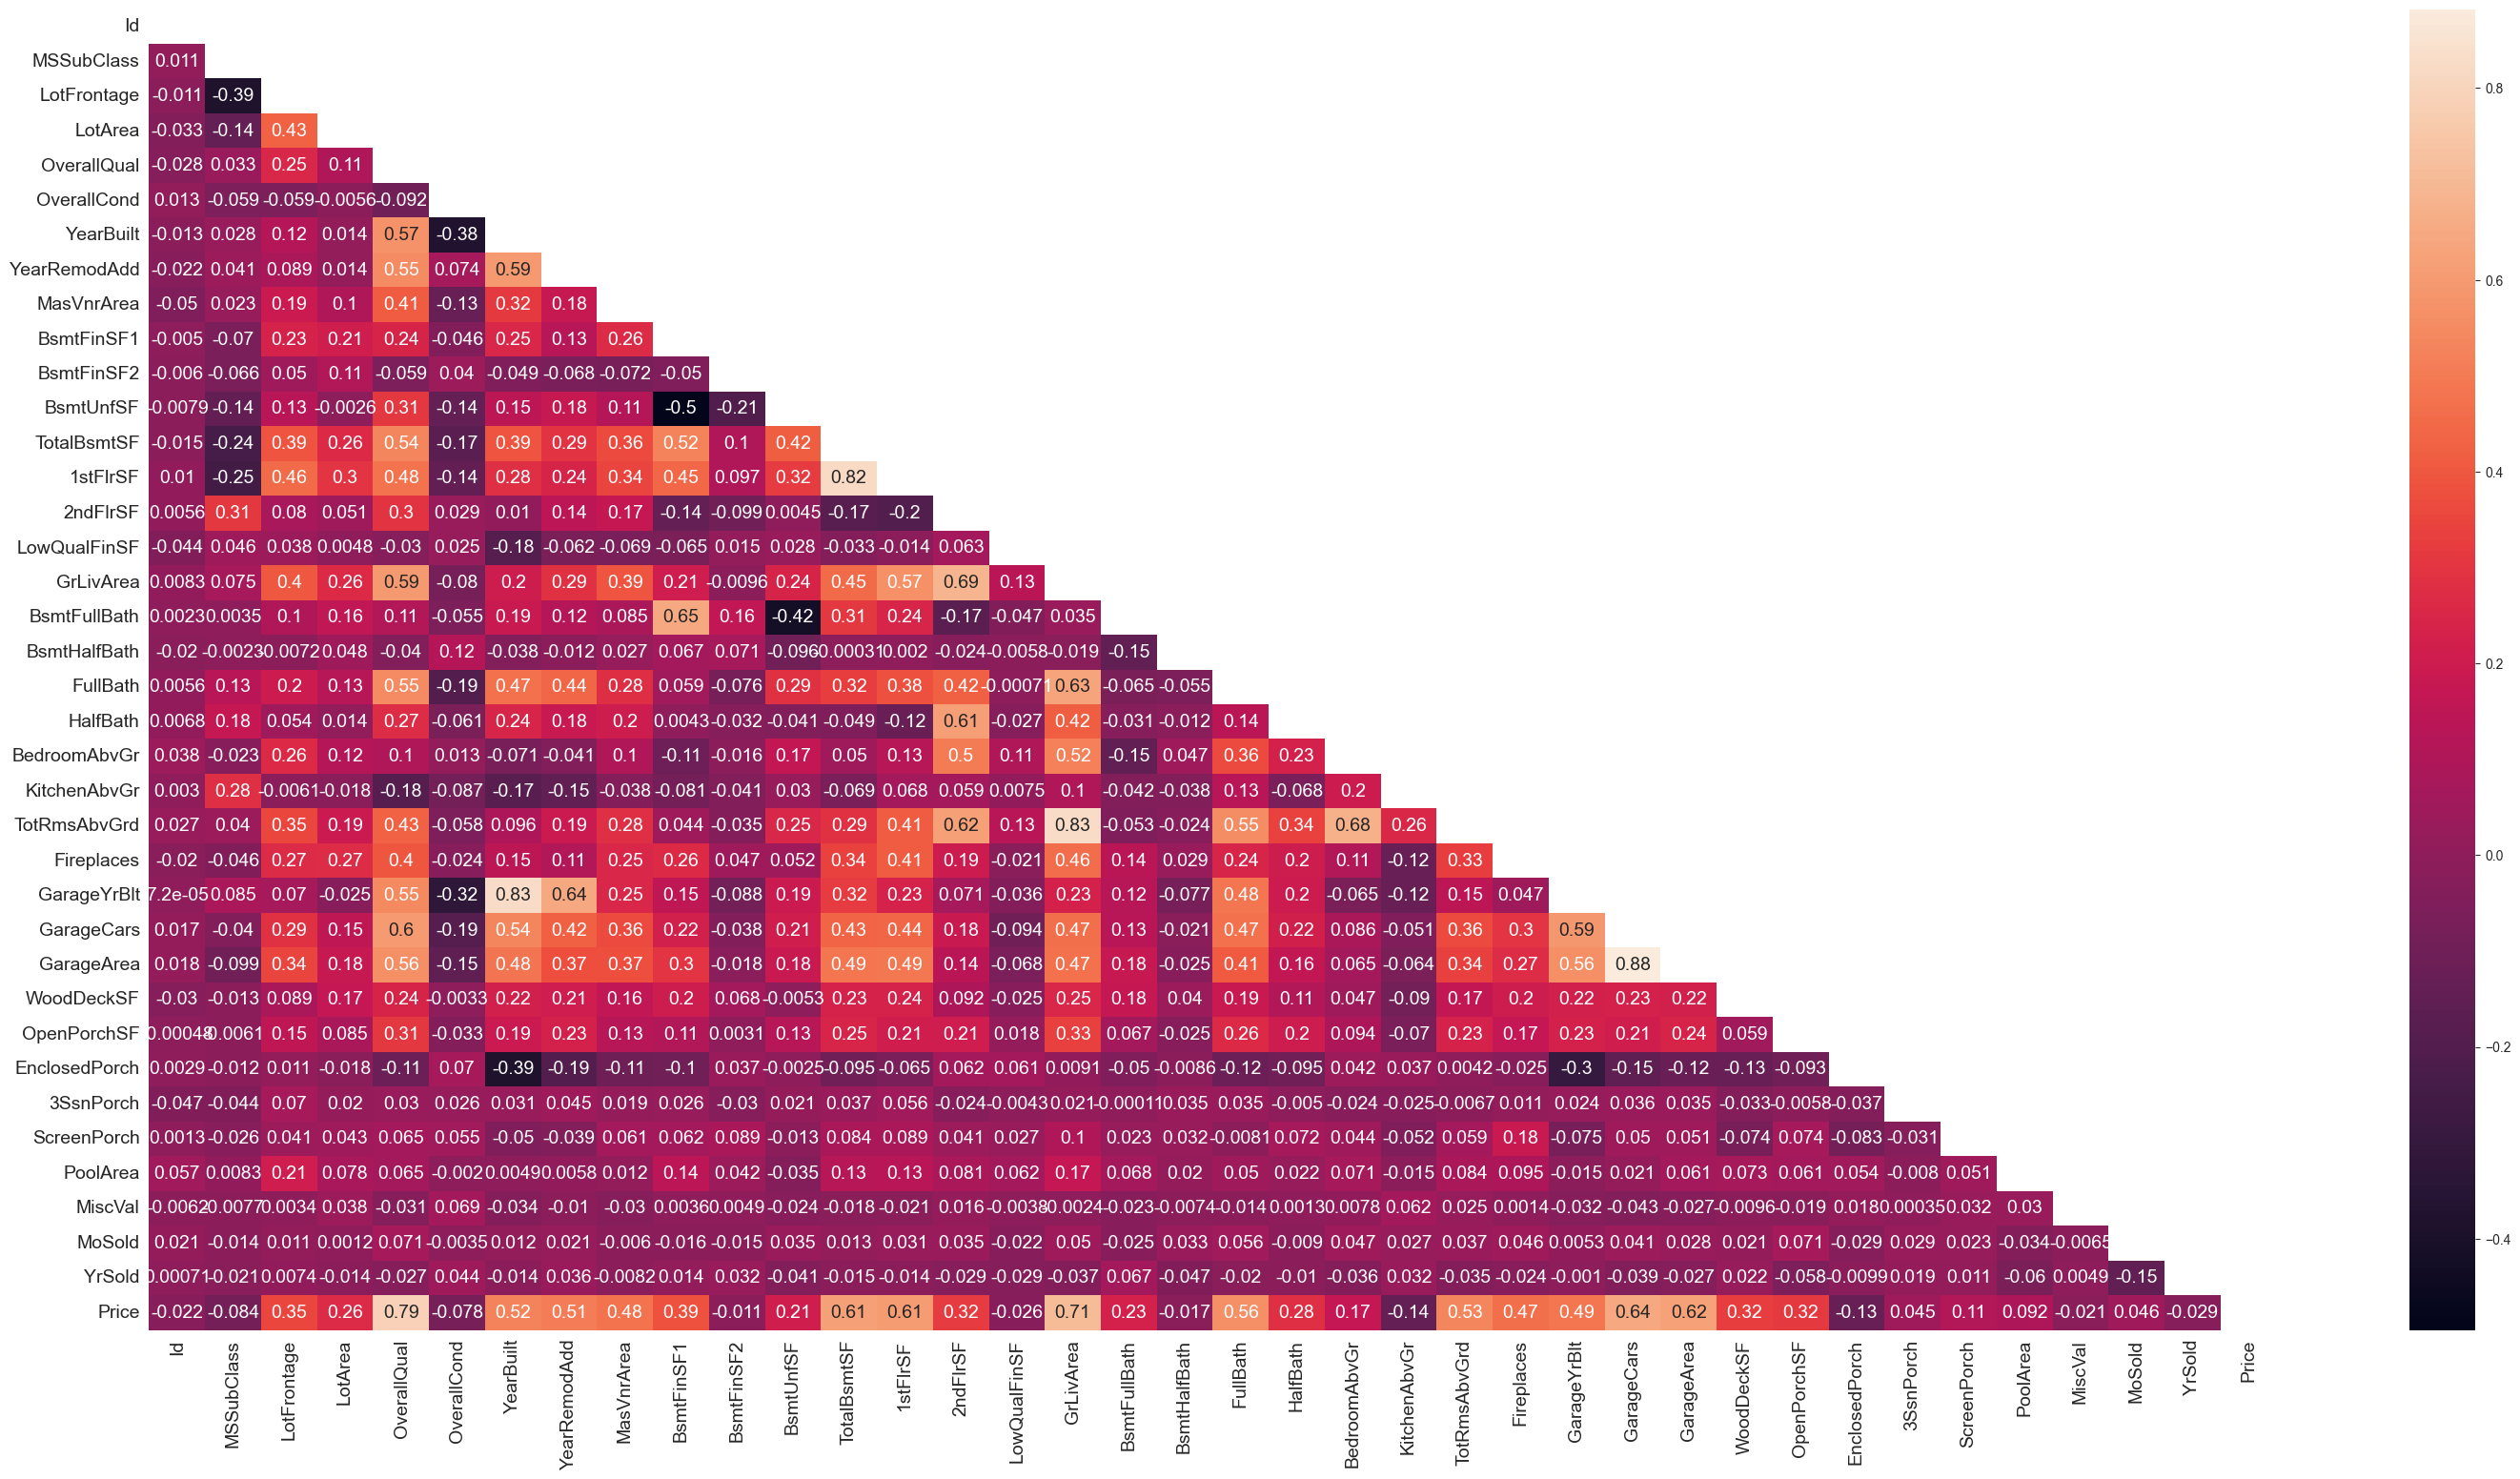

In [117]:
plt.figure(figsize=(36, 18))
sns.heatmap(numeric_data.corr(), mask=ames_mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

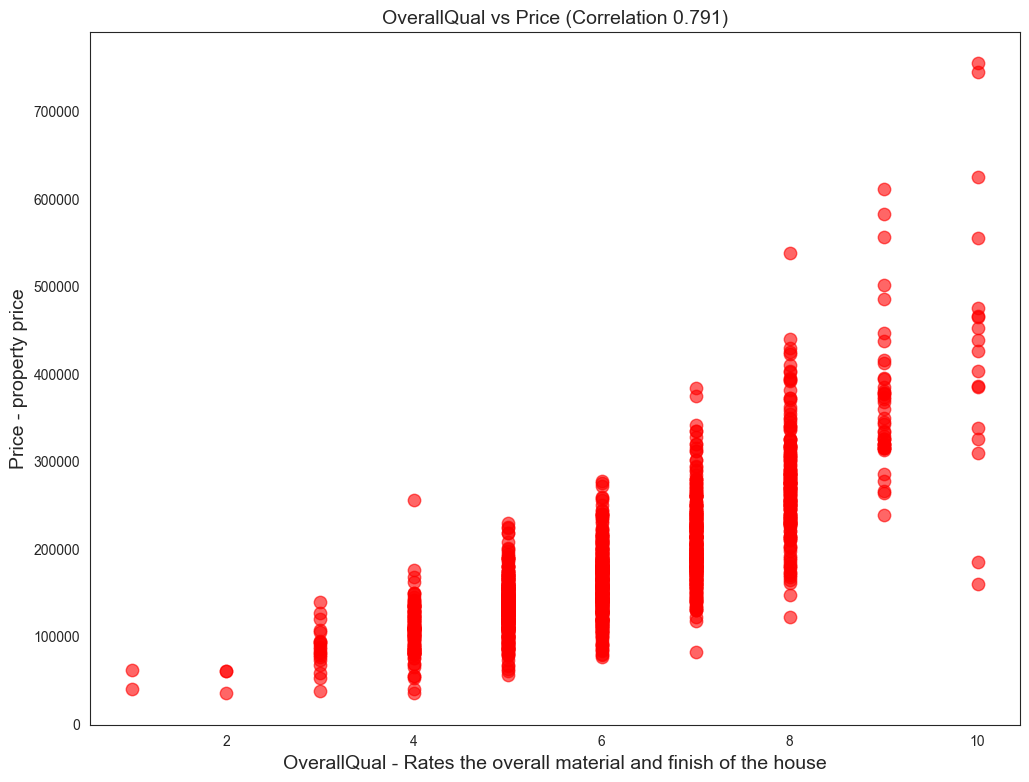

In [131]:
oq_tgt_corr = round(ames_data['OverallQual'].corr(ames_data['Price']),3)
plt.figure(figsize=(12, 9))
plt.scatter(x=ames_data['OverallQual'], y=ames_data['Price'], alpha=0.6, s=80, color='red')

plt.title(f"OverallQual vs Price (Correlation {oq_tgt_corr})", fontsize=14)
plt.xlabel('OverallQual - Rates the overall material and finish of the house', fontsize=14)
plt.ylabel('Price - property price', fontsize=14)
plt.show()

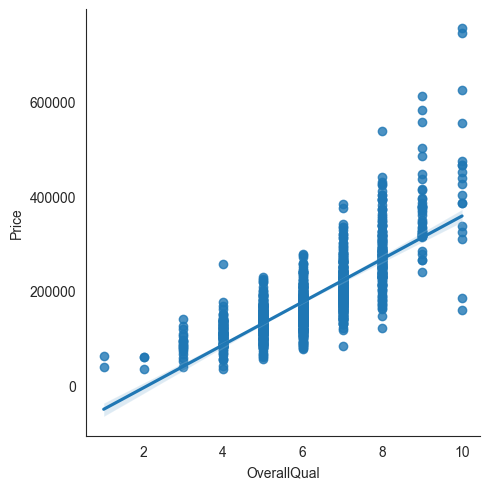

In [132]:
sns.lmplot(x='OverallQual', y='Price', data=ames_data)

# Отображаем график
plt.show()

TRANING AMD TEST DATASET SPLIT

In [133]:
prices = calif_data['Price']
features = calif_data.drop('Price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

MULTIVARIABLE REGRESSION

In [134]:
calif_regr = LinearRegression()

In [135]:

calif_regr.fit(x_train, y_train)

print('Training calif_data r-squared:', calif_regr.score(x_train, y_train))
print('Test calif_data r-squared:', calif_regr.score(x_test, y_test))

print('Intercept', calif_regr.intercept_)
pd.DataFrame(data=calif_regr.coef_, index=x_train.columns, columns=['coef'])

Training calif_data r-squared: 0.6074049305021048
Test calif_data r-squared: 0.6009790143129112
Intercept -37.48696576537316


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


Price transformation

In [136]:
calif_data['Price'].skew()

0.9777632739098345

In [139]:
calif_data['Price'].min

<bound method Series.min of 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64>

In [140]:
y_log = np.log(calif_data['Price'])
y_log.tail()

20635   -0.247180
20636   -0.260067
20637   -0.080126
20638   -0.166055
20639   -0.112050
Name: Price, dtype: float64

In [141]:
y_log.skew()

-0.17317539032496646

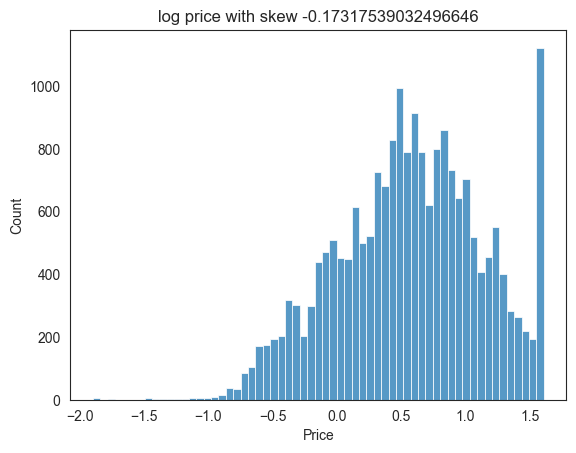

In [144]:
sns.histplot(y_log)
plt.title(f'log price with skew {y_log.skew()}')
plt.show()

REGRESSION USING LOG PRICES

In [145]:
calif_prices_log = np.log(calif_data['Price'])
calif_features_log = calif_data.drop('Price', axis=1)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(calif_features_log, calif_prices_log, test_size=0.2, random_state=10)

regr_log = LinearRegression()
regr_log.fit(x_train_log, y_train_log)

print("Train calif_data r-squared:", regr_log.score(x_train_log, y_train_log))
print('Test calif_data r-squared:', regr_log.score(x_test_log, y_test_log))

print('Intercept', regr_log.intercept_)
pd.DataFrame(data=regr_log.coef_, index=x_train_log.columns, columns=['coef'])

Train calif_data r-squared: 0.6168233836099825
Test calif_data r-squared: 0.6037489256704884
Intercept -24.570490460846685


,coef
MedInc,0.186068
HouseAge,0.002279
AveRooms,-0.030865
AveBedrms,0.224873
Population,0.000008
AveOccup,-0.002259
Latitude,-0.289071
Longitude,-0.289146


MAY BE SOME METRICS ABORT?

In [ ]:
# p-value
# VIF (Мультиколинеарность)

p-value. Which parametrs are important

In [146]:
x_incl_const = sm.add_constant(x_train_log)
calif_model = sm.OLS(y_train_log, x_incl_const)
calif_results = calif_model.fit()

#calif_results.params
#calif_results.pvalues

pd.DataFrame({'coef': calif_results.params, 'p-value': round(calif_results.pvalues, 3)})

,coef,p-value
const,-24.570490,0.000
MedInc,0.186068,0.000
HouseAge,0.002279,0.000
AveRooms,-0.030865,0.000
AveBedrms,0.224873,0.000
Population,0.000008,0.001
AveOccup,-0.002259,0.000
Latitude,-0.289071,0.000
Longitude,-0.289146,0.000


            Мультиколинеарность (насколько параметр связан с другими параметрами)
                    Population = a0 + a1 MedInc + a2 AveRooms + ... + a7 Longitude

                                    1
                    VIFpopulation = --------------
                              (1 - Rpopulation^2)

In [148]:
calif_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [149]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

2.4741199441522226

In [150]:
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=1) for i in range(x_incl_const.shape[1])]

pd.DataFrame({'coef_name': x_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,2.47
1,MedInc,2.47
2,HouseAge,2.47
3,AveRooms,2.47
4,AveBedrms,2.47
5,Population,2.47
6,AveOccup,2.47
7,Latitude,2.47
8,Longitude,2.47


Упростим BIC

In [151]:
# Original model with log prices and all features
x_incl_const = sm.add_constant(x_train_log)
model = sm.OLS(y_train_log, x_incl_const)
res = model.fit()

org_coef = pd.DataFrame({'coef': res.params, 'p-value': round(res.pvalues, 3)})

print('BIC is', res.bic)
print('r-squared is', res.rsquared)


BIC is 12467.657146183055
r-squared is 0.6168233836099823
